# Q-Learning on Grid-World (Frozen Lake) Environment 
(16 States, 4 Actions)

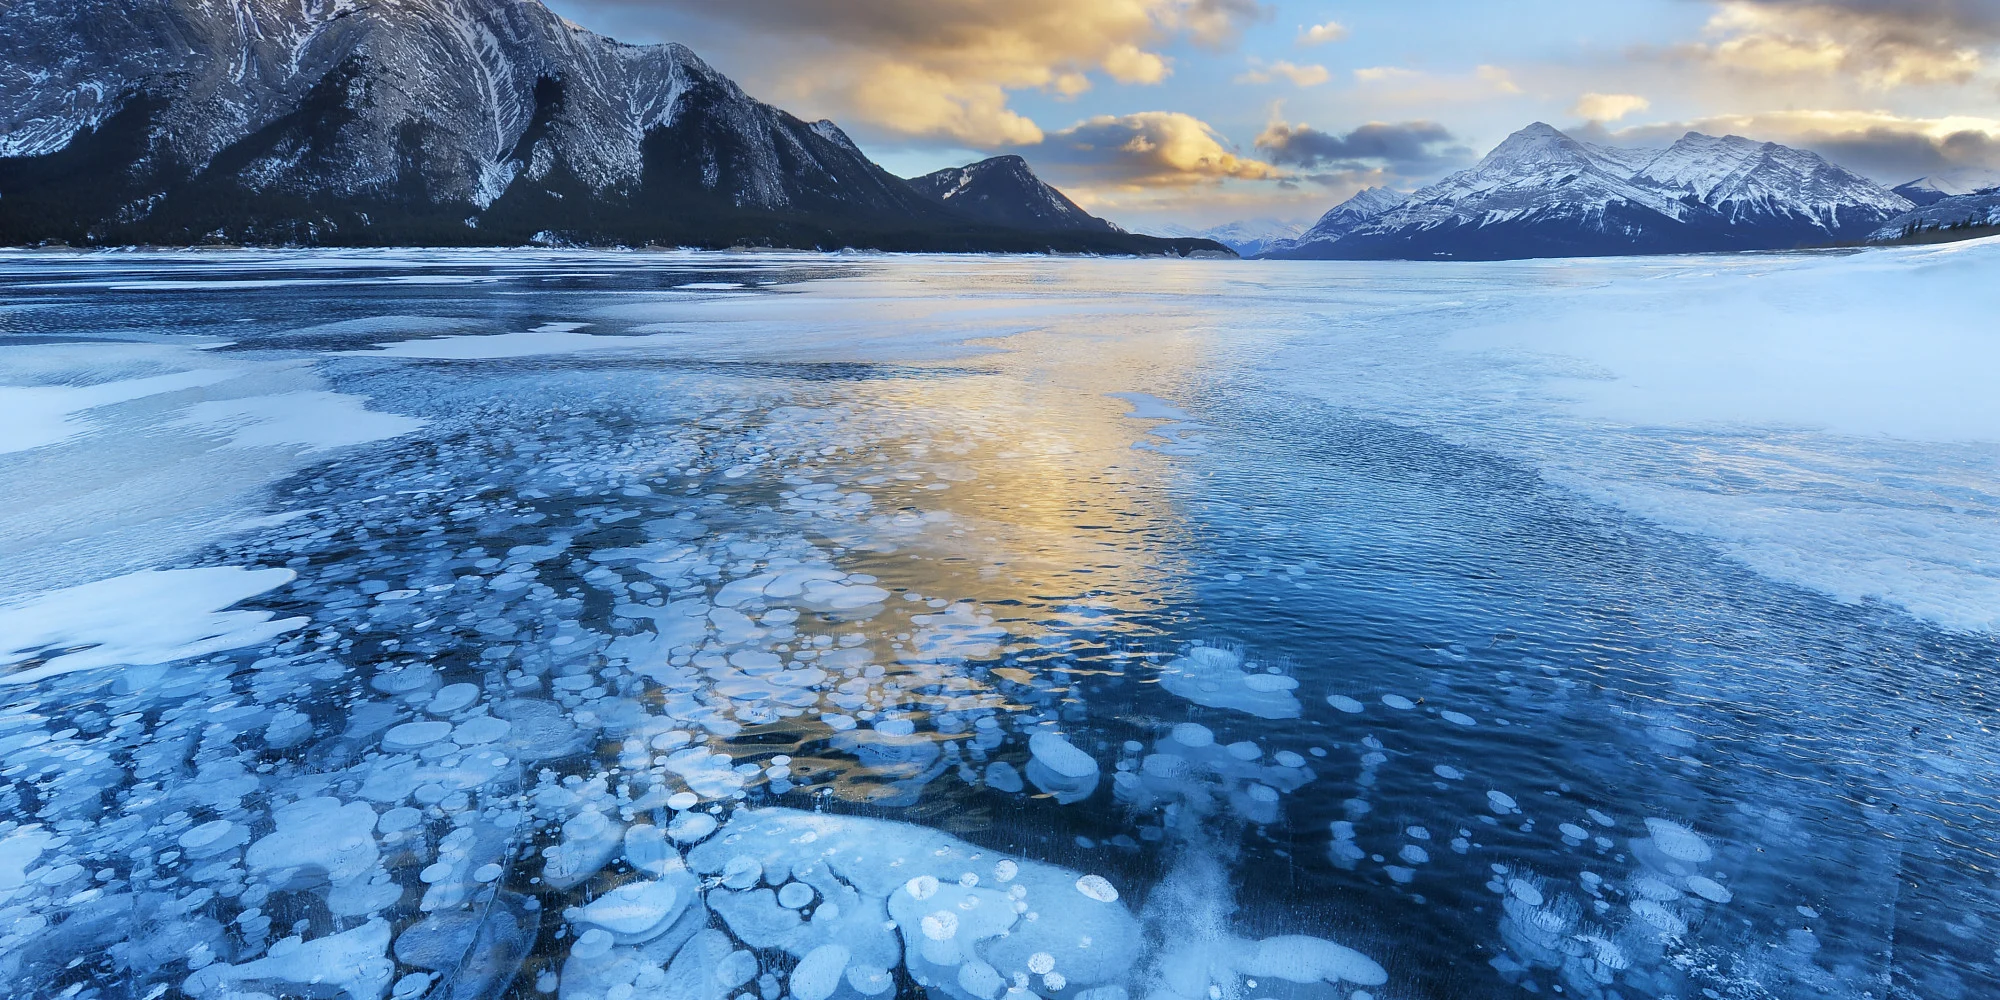

### Set up Libraries and Create the environment

In [23]:
import numpy as np
import gym
import random
import time
import os

In [26]:
os.environ['PYTHONHASHSEED']=str(0)
random.seed(0)
np.random.seed(0)

In [27]:
env = gym.make("FrozenLake-v0")

### Initialize Q table

In [28]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print(state_space_size,action_space_size)
q_table = np.zeros((state_space_size, action_space_size))

16 4


In [29]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Initialize Q learning parameters

In [30]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

### Implemet Q-learning

In [33]:
rewards_all_episodes = []
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0
    #print(random.getstate())
    for step in range(max_steps_per_episode): 
        #choose action selection using Epsilon greedy strategy
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
            
        # Perform action
        new_state, reward, done, info = env.step(action)
        #Update Q table for (state,action)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    
        #Trasition to new state
        state = new_state
        rewards_current_episode += reward 
        if done == True: 
            break
        # decay epsilon to move from exploration to exploitation of learned actions    
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)


###  Calculate and print the average reward per thousand episodes

In [34]:
#print(rewards_all_episodes)
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.1300000000000001
2000 :  0.16800000000000012
3000 :  0.22000000000000017
4000 :  0.3960000000000003
5000 :  0.36800000000000027
6000 :  0.34900000000000025
7000 :  0.33800000000000024
8000 :  0.43400000000000033
9000 :  0.5970000000000004
10000 :  0.6450000000000005


###  Update Q table

In [35]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[4.94537439e-01 4.05146912e-01 4.59748590e-01 4.29203089e-01]
 [5.14458376e-04 3.45522847e-01 2.31696663e-02 9.93762498e-02]
 [1.23481782e-01 2.93928505e-01 1.03007314e-01 7.18630702e-02]
 [3.84852925e-02 1.26988140e-01 5.98620764e-02 2.73531745e-01]
 [5.15305566e-01 3.91965202e-01 3.38574903e-01 3.25531029e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.29769932e-01 6.00165148e-02 1.49312570e-01 2.29162208e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.08683176e-01 4.17560405e-01 3.67732012e-01 5.35403651e-01]
 [2.28413190e-01 6.22467030e-01 4.29941160e-01 3.03998167e-01]
 [5.62124375e-01 2.92582556e-01 4.19093421e-01 2.65981736e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.04391622e-01 3.76867927e-01 7.29900339e-01 3.52704418e-01]
 [6.31482118e-01 8.57533699e-01 6.29681698e-01 7.17703247e-01]
 [0.00000000e+00 0.00000000e

### Q-learning agent playing Frozen Lake

In [37]:
env = gym.make("FrozenLake-v0",is_slippery=False)
for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):        
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state              
        action = np.argmax(q_table[state,:])        
        # Take action
        new_state, reward, done, info = env.step(action)
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
        # Set new state
        state = new_state
        
env.close()

  (Left)
SFFF
FHFH
FFFH
HFFG
****You fell through a hole!****
